In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import king county data from Data folder

data = pd.read_csv('Data/kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

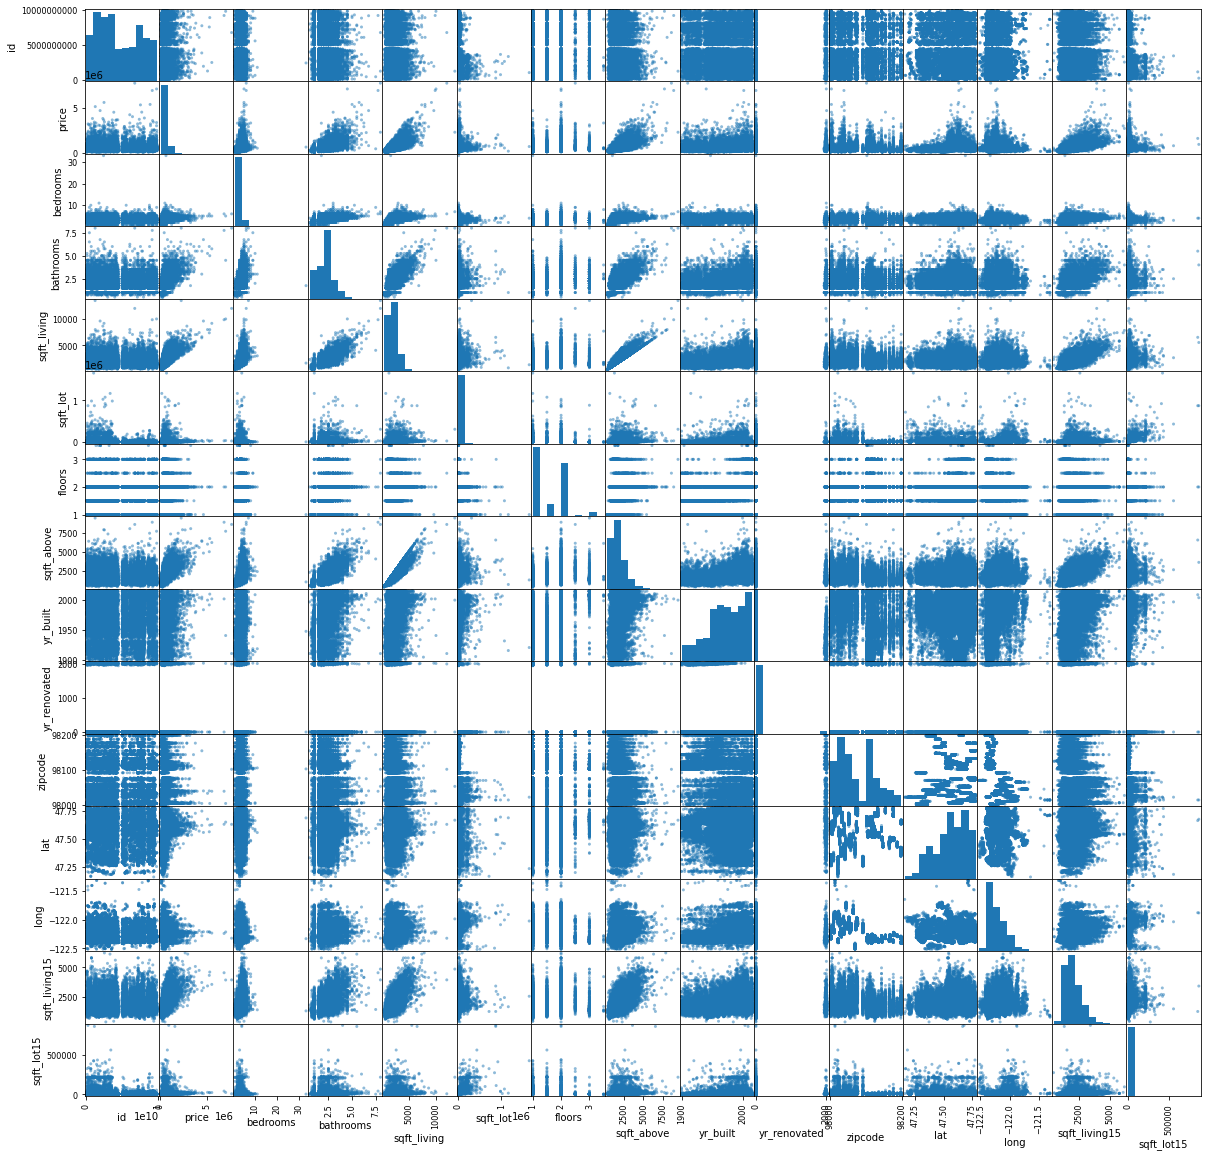

In [25]:
pd.plotting.scatter_matrix(data, figsize=(20,20));

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


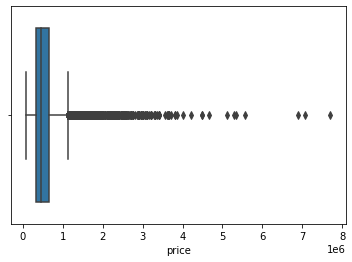

In [4]:
# The price variable looks skewed base on histogram; check distribution

fig, ax = plt.subplots()

sns.boxplot(data['price'], ax=ax);

For our purposes, we do not need to consider houses with prices greater than $1 million.

In [5]:
# drop records with price greater than $1000000

data = data.loc[ data['price'] <= 1000000 ]

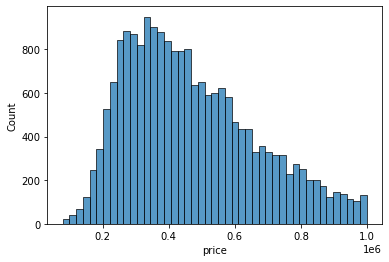

In [6]:
# re-check distribution of price

fig, ax = plt.subplots()

sns.histplot(data['price']);

Price is still skewed, but much less so.

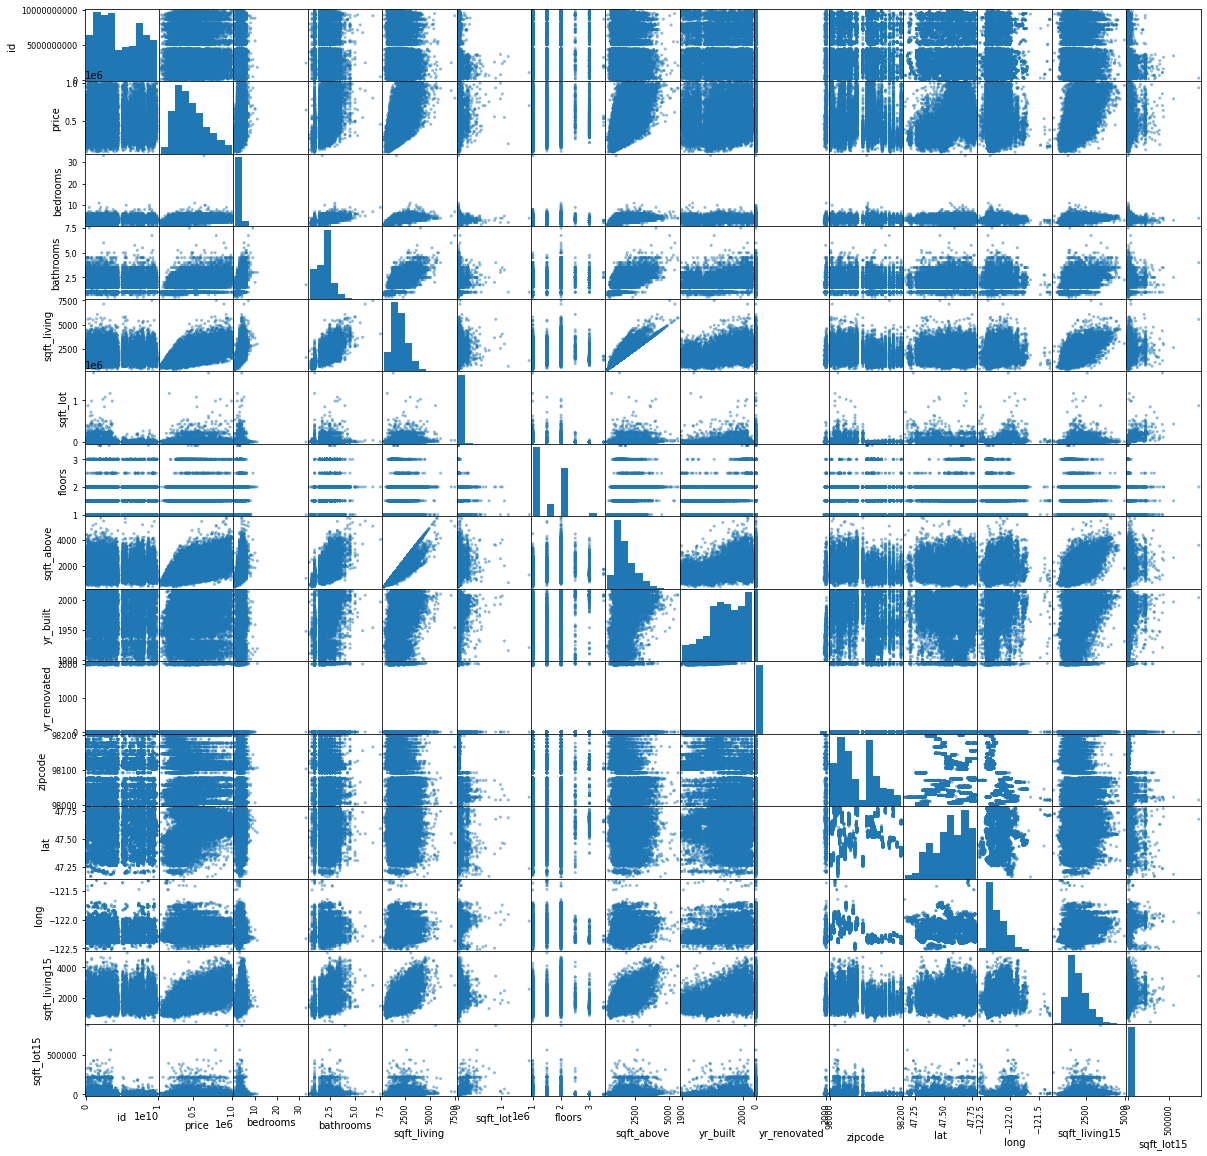

In [29]:
pd.plotting.scatter_matrix(data, figsize=(20,20));

In [7]:
# check for missing values

data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2227
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3577
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Waterfront

In [33]:
data.waterfront.value_counts()

NO     17862
YES       50
Name: waterfront, dtype: int64

#### View

In [34]:
data.view.value_counts()

NONE         18611
AVERAGE        763
GOOD           319
FAIR           260
EXCELLENT      129
Name: view, dtype: int64

#### Fill Null Values: Waterfront & View

In [8]:
# assume no waterfront, no view, if not specified

data.waterfront.fillna('NO', inplace=True)
data.view.fillna('NONE', inplace=True)

#### Yr_renovated

In [9]:
data.yr_renovated.value_counts()

0.0       15962
2014.0       63
2013.0       27
2000.0       25
2007.0       23
          ...  
1956.0        1
1948.0        1
1971.0        1
1953.0        1
1934.0        1
Name: yr_renovated, Length: 70, dtype: int64

#### Fill null values, engineer new feature and drop yr_renovated

In [10]:
# engineer new feature, renovated, then drop yr_renovated

# assume not renovated if not specified
data.yr_renovated.fillna(0, inplace=True)

# create renovated flag, set to true
data['renovated'] = 1
# set renovated flag to false for houses with yr_renovated value of 0
data.loc[ data['yr_renovated'] == 0, 'renovated'] = 0

# drop yr_renovated
data.drop('yr_renovated', axis=1, inplace=True)

In [11]:
# check data types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20139 non-null  int64  
 1   date           20139 non-null  object 
 2   price          20139 non-null  float64
 3   bedrooms       20139 non-null  int64  
 4   bathrooms      20139 non-null  float64
 5   sqft_living    20139 non-null  int64  
 6   sqft_lot       20139 non-null  int64  
 7   floors         20139 non-null  float64
 8   waterfront     20139 non-null  object 
 9   view           20139 non-null  object 
 10  condition      20139 non-null  object 
 11  grade          20139 non-null  object 
 12  sqft_above     20139 non-null  int64  
 13  sqft_basement  20139 non-null  object 
 14  yr_built       20139 non-null  int64  
 15  zipcode        20139 non-null  int64  
 16  lat            20139 non-null  float64
 17  long           20139 non-null  float64
 18  sqft_l

In [12]:
data.date.head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [13]:
# create month feature
data['mo_sold'] = data.date.map(lambda x: x.split('/')[0])

# drop data
data.drop('date', axis=1, inplace=True)

In [14]:
data.waterfront.value_counts()

NO     20089
YES       50
Name: waterfront, dtype: int64

In [15]:
# make waterfront feature 0 or 1 instead of no or yes

data.waterfront.replace({'NO': 0, 'YES': 1}, inplace=True)

In [16]:
data.view.value_counts()

NONE         18668
AVERAGE        763
GOOD           319
FAIR           260
EXCELLENT      129
Name: view, dtype: int64

In [17]:
# make view feature 0, 1, 2, 3 or 4 instead of none, fair, average, good, excellent

data.view.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

In [18]:
data.condition.value_counts()

Average      13076
Good          5347
Very Good     1520
Fair           168
Poor            28
Name: condition, dtype: int64

In [19]:
# make condition feature 0, 1, 2, 3 or 4 instead of poor, fair, average, good, very good

data.condition.replace({'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [20]:
# replace grade description with the numerical grade at the beginning of the string, as an int

data['grade'] = data.grade.map(lambda x: x.split(' ')[0]).astype(int)

In [21]:
data.sqft_basement.value_counts()

0.0       12282
?           424
600.0       211
500.0       206
700.0       193
          ...  
2196.0        1
2000.0        1
704.0         1
1840.0        1
20.0          1
Name: sqft_basement, Length: 266, dtype: int64

In [22]:
# replace ?s with 0 in sqft_basement, assume no basement if not specified
data.sqft_basement.replace('?', '0.0', inplace=True)

# cast to float
data['sqft_basement'] = data.sqft_basement.astype(float)

# create new feature, basement flag
data['basement'] = 1
# set flag to 0 if sqft of basement is 0
data.loc[ data['sqft_basement'] == 0, 'basement' ] = 0

# drop sqft_basement (not enough data)
data.drop('sqft_basement', axis=1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20139 non-null  int64  
 1   price          20139 non-null  float64
 2   bedrooms       20139 non-null  int64  
 3   bathrooms      20139 non-null  float64
 4   sqft_living    20139 non-null  int64  
 5   sqft_lot       20139 non-null  int64  
 6   floors         20139 non-null  float64
 7   waterfront     20139 non-null  int64  
 8   view           20139 non-null  int64  
 9   condition      20139 non-null  int64  
 10  grade          20139 non-null  int64  
 11  sqft_above     20139 non-null  int64  
 12  yr_built       20139 non-null  int64  
 13  zipcode        20139 non-null  int64  
 14  lat            20139 non-null  float64
 15  long           20139 non-null  float64
 16  sqft_living15  20139 non-null  int64  
 17  sqft_lot15     20139 non-null  int64  
 18  renova

In [24]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.617413
sqft_living      0.604188
sqft_living15    0.549455
sqft_above       0.515646
lat              0.440495
bathrooms        0.439473
bedrooms         0.288019
floors           0.269781
view             0.213743
basement         0.155946
sqft_lot         0.094206
sqft_lot15       0.082217
long             0.078016
renovated        0.074216
yr_built         0.058111
waterfront       0.051719
condition        0.033648
id               0.017347
zipcode         -0.019219
Name: price, dtype: float64

Grade appears to be the most highly correlated feature with the price of a home. I will use this feature to create a baseline model.

## Baseline Model

In [25]:
# import statsmodels libraries

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
# import library for train test split

from sklearn.model_selection import train_test_split

# 70% / 30% train test split

X_train, X_test, y_train, y_test = train_test_split(
    data[['sqft_living']], data[['price']], test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression

all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows

all_train.head()

,sqft_living,price
10182,1510,260000.0
1722,1240,350000.0
21559,3087,399950.0
9145,2890,898500.0
10325,2820,750000.0


In [28]:
# build formula

formula = 'price ~ sqft_living'

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     8131.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:52:58   Log-Likelihood:            -1.8857e+05
No. Observations:               14097   AIC:                         3.772e+05
Df Residuals:                   14095   BIC:                         3.772e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.617e+05   3626.725     44.578      0.000    1.55e+05    1.69e+05
sqft_living   156.1561      1.732     90.171      0.000     152.762     159.551
==============================================================================
Omnibus:                      474.288   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.381
Skew:                           0.472   Prob(JB):                    2.23e-114
Kurtosis:                       2.973   Cond. No.                     5.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

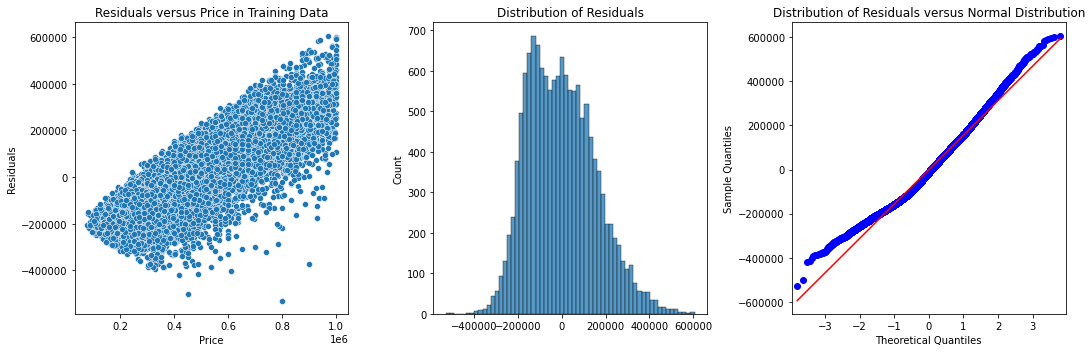

In [34]:
'''check assumptions'''

# compute residuals for training data

residuals = (y_train['price'] - model.predict(X_train)).values

# check homoscedasticity, and normality of residuals

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(x=y_train['price'], y=residuals, ax=ax[0])

ax[1].set_title('Distribution of Residuals')

sns.histplot(residuals, ax=ax[1])

ax[2].set_title('Distribution of Residuals versus Normal Distribution')
sm.qqplot(residuals, line='s', ax=ax[2])

fig.tight_layout();

Correlation between sqft_living & grade: 0.6939669090673333
Correlation between price & grade: 0.6174132913049935


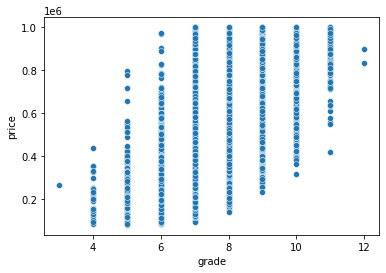

In [48]:
'''The next most correlated feature with price is grade. Check correlation with sqft_living and linearity.'''

print('Correlation between sqft_living & grade: {}'.format(np.corrcoef(data['grade'], data['sqft_living'])[0,1]))

print('Correlation between price & grade: {}'.format(np.corrcoef(data['grade'], data['price'])[0,1]))

fig, ax = plt.subplots()

sns.scatterplot(x='grade', y='price', data=data);

In [54]:
# add grade feature

# 70% / 30% train test split
X_train, X_test, y_train, y_test = train_test_split(
    data[['sqft_living', 'grade']], data[['price']], test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression
all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows
all_train.head()

# build formula

formula = 'price ~ sqft_living + grade'

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     5590.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:10:06   Log-Likelihood:            -1.8767e+05
No. Observations:               14097   AIC:                         3.753e+05
Df Residuals:                   14094   BIC:                         3.754e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.599e+05   1.02e+04    -25.555      0.000    -2.8e+05    -2.4e+05
sqft_living    87.0160      2.260     38.499      0.000      82.586      91.446
grade        7.417e+04   1686.354     43.982      0.000    7.09e+04    7.75e+04
==============================================================================
Omnibus:                      571.377   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              641.998
Skew:                           0.514   Prob(JB):                    3.91e-140
Kurtosis:                       3.187   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

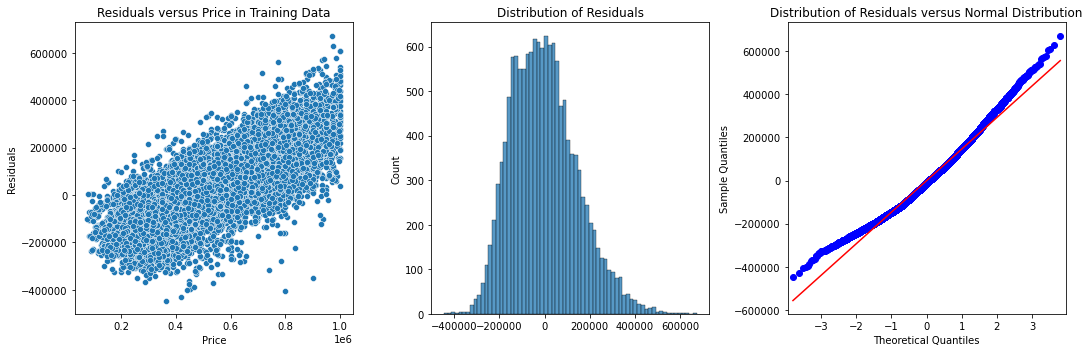

In [55]:
'''check assumptions for model 2'''

# compute residuals for training data

residuals = (y_train['price'] - model.predict(X_train)).values

# check homoscedasticity, and normality of residuals

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(x=y_train['price'], y=residuals, ax=ax[0])

ax[1].set_title('Distribution of Residuals')

sns.histplot(residuals, ax=ax[1])

ax[2].set_title('Distribution of Residuals versus Normal Distribution')
sm.qqplot(residuals, line='s', ax=ax[2])

fig.tight_layout();

In [49]:
'''sqft_living15 and sqft_above are also somewhat highly correlated with price; are they too highly correlated with
sqft_living to include?'''

print('Correlation between sqft_living & sqft_living15: {}'.format(np.corrcoef(data['sqft_living15'],\
                                                                               data['sqft_living'])[0,1]))

print('Correlation between sqft_living & sqft_above: {}'.format(np.corrcoef(data['sqft_living'],\
                                                                            data['sqft_above'])[0,1]))

Correlation between sqft_living & sqft_living15: 0.7319208476449514
Correlation between sqft_living & sqft_above: 0.8499813367965396


In [50]:
''' sqft_living15 and sqft_above are too highly correlated with sqft_living! Let's explore other options. '''

" sqft_living15 and sqft_above are too highly correlated with sqft_living! Let's explore other options. "

In [59]:
# but I am curious; what happens if I include sqft_living15 and sqft_above?

# add sqft_living15, sqft_above

features = ['sqft_living', 'grade', 'sqft_living15', 'sqft_above']

# 70% / 30% train test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[['price']], test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression
all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows
all_train.head()

# build formula

predictors = '+'.join(features)

formula = 'price' + ' ~ ' + predictors

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     2958.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:13:38   Log-Likelihood:            -1.8749e+05
No. Observations:               14097   AIC:                         3.750e+05
Df Residuals:                   14092   BIC:                         3.750e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.874e+05   1.03e+04    -27.797      0.000   -3.08e+05   -2.67e+05
sqft_living     102.7828      3.313     31.026      0.000      96.289     109.276
grade          7.413e+04   1800.999     41.162      0.000    7.06e+04    7.77e+04
sqft_living15    45.0563      3.194     14.105      0.000      38.795      51.318
sqft_above      -52.4895      3.465    -15.148      0.000     -59.281     -45.698
==============================================================================
Omnibus:                      517.776   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.925
Skew:                           0.484   Prob(JB):                    8.70e-126
Kurtosis:                       3.206   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R^2 value *barely* increased! I might leave those out, for fear of multicollinearity. Let me check the assumptions of linear regression.

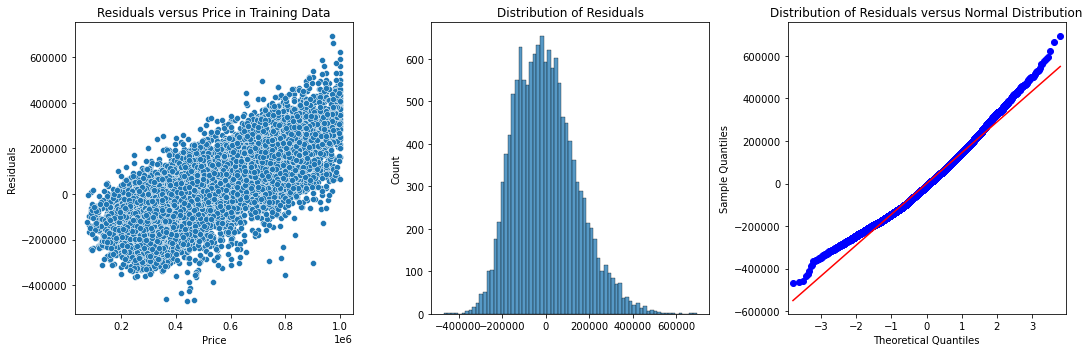

In [60]:
'''check assumptions for model 2.5'''

# compute residuals for training data

residuals = (y_train['price'] - model.predict(X_train)).values

# check homoscedasticity, and normality of residuals

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(x=y_train['price'], y=residuals, ax=ax[0])

ax[1].set_title('Distribution of Residuals')

sns.histplot(residuals, ax=ax[1])

ax[2].set_title('Distribution of Residuals versus Normal Distribution')
sm.qqplot(residuals, line='s', ax=ax[2])

fig.tight_layout();

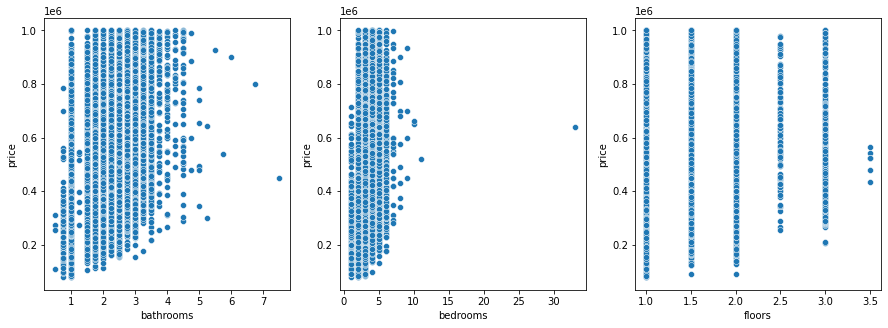

In [51]:
# bathrooms, bedrooms and floors

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.scatterplot(x='bathrooms', y='price', data=data, ax=ax[0])

sns.scatterplot(x='bedrooms', y='price', data=data, ax=ax[1])

sns.scatterplot(x='floors', y='price', data=data, ax=ax[2]);

In [61]:
# add bathrooms, bedrooms and floors

features.append('bathrooms')
features.append('bedrooms')
features.append('floors')

# 70% / 30% train test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[['price']], test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression
all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows
all_train.head()

# build formula

predictors = '+'.join(features)

formula = 'price' + ' ~ ' + predictors

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1731.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:15:40   Log-Likelihood:            -1.8741e+05
No. Observations:               14097   AIC:                         3.748e+05
Df Residuals:                   14089   BIC:                         3.749e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.661e+05   1.14e+04    -23.268      0.000   -2.89e+05   -2.44e+05
sqft_living     132.8902      4.089     32.499      0.000     124.875     140.905
grade          7.255e+04   1888.834     38.412      0.000    6.89e+04    7.63e+04
sqft_living15    46.5287      3.225     14.425      0.000      40.206      52.851
sqft_above      -68.0495      3.924    -17.343      0.000     -75.741     -60.358
bathrooms     -2.497e+04   2774.427     -9.000      0.000   -3.04e+04   -1.95e+04
bedrooms      -9575.2674   1779.299     -5.381      0.000   -1.31e+04   -6087.606
floors         2.577e+04   3112.444      8.280      0.000    1.97e+04    3.19e+04
==============================================================================
Omnibus:                      538.679   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.020
Skew:                           0.490   Prob(JB):                    1.14e-131
Kurtosis:                       3.258   Cond. No.                     3.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

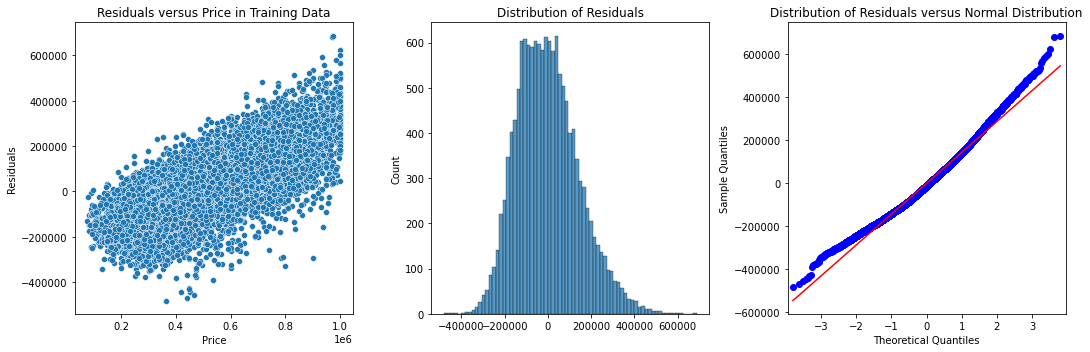

In [62]:
'''check assumptions for model 2.5'''

# compute residuals for training data

residuals = (y_train['price'] - model.predict(X_train)).values

# check homoscedasticity, and normality of residuals

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(x=y_train['price'], y=residuals, ax=ax[0])

ax[1].set_title('Distribution of Residuals')

sns.histplot(residuals, ax=ax[1])

ax[2].set_title('Distribution of Residuals versus Normal Distribution')
sm.qqplot(residuals, line='s', ax=ax[2])

fig.tight_layout();

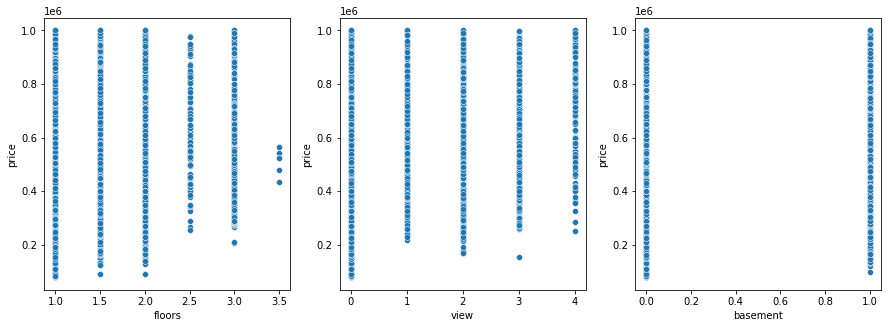

In [64]:
# view and basement are next most correlated with price; does linearity hold?

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.scatterplot(x='view', y='price', data=data, ax=ax[1])

sns.scatterplot(x='basement', y='price', data=data, ax=ax[2]);

In [90]:
# add bathrooms and bedrooms

features.append('view')
features.append('basement')

# 70% / 30% train test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[['price']], test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression
all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows
all_train.head()

# build formula

predictors = '+'.join(features)

formula = 'price' + ' ~ ' + predictors

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1790.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:22:56   Log-Likelihood:            -1.8730e+05
No. Observations:               14097   AIC:                         3.746e+05
Df Residuals:                   14089   BIC:                         3.747e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.775e+05   1.02e+04    -27.127      0.000   -2.98e+05   -2.57e+05
sqft_living      58.7237      5.467     10.742      0.000      48.008      69.439
grade          6.864e+04   1853.392     37.034      0.000     6.5e+04    7.23e+04
sqft_living15    41.9738      3.217     13.049      0.000      35.669      48.279
sqft_above       -3.9102      6.335     -0.617      0.537     -16.329       8.508
floors          1.33e+04   2853.105      4.662      0.000    7709.018    1.89e+04
view           3.262e+04   2012.895     16.206      0.000    2.87e+04    3.66e+04
basement       4.445e+04   4546.516      9.777      0.000    3.55e+04    5.34e+04
==============================================================================
Omnibus:                      497.503   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.654
Skew:                           0.471   Prob(JB):                    1.62e-120
Kurtosis:                       3.224   Cond. No.                     2.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

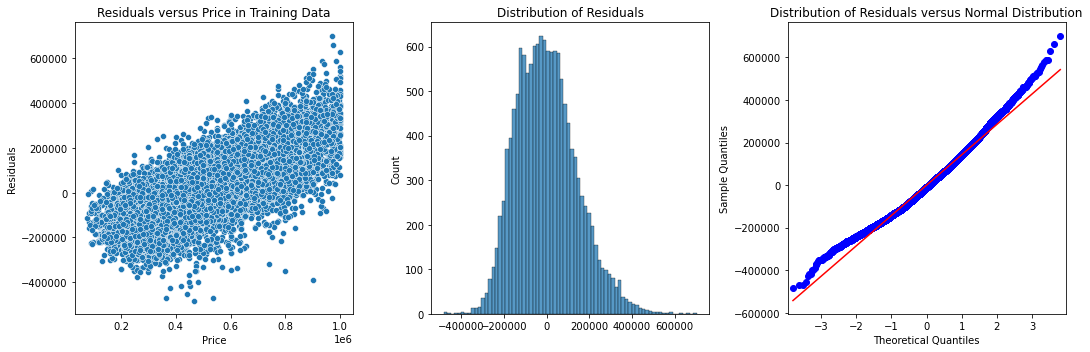

In [91]:
'''check assumptions for model 3'''

# compute residuals for training data

residuals = (y_train['price'] - model.predict(X_train)).values

# check homoscedasticity, and normality of residuals

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set(title='Residuals versus Price in Training Data', ylabel='Residuals', xlabel='Price')

sns.scatterplot(x=y_train['price'], y=residuals, ax=ax[0])

ax[1].set_title('Distribution of Residuals')

sns.histplot(residuals, ax=ax[1])

ax[2].set_title('Distribution of Residuals versus Normal Distribution')
sm.qqplot(residuals, line='s', ax=ax[2])

fig.tight_layout();

The R^2 value for my model is still not very good, although I've included the 7 features that are the most correlated with price in my model.

In [107]:
new_price = pd.DataFrame(np.log(data['price'].values), columns=['price'])

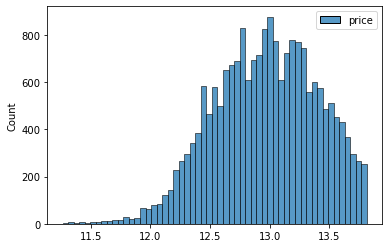

In [108]:
sns.histplot(new_price);

In [109]:
# 70% / 30% train test split
X_train, X_test, y_train, y_test = train_test_split(
    data[features], new_price, test_size=0.3, random_state=421)

# concatenate X_train & y_train for statsmodels linear regression
all_train = pd.concat([X_train, y_train], axis=1)

# inspect all_train first five rows
all_train.head()

# build formula

predictors = '+'.join(features)

formula = 'price' + ' ~ ' + predictors

# fit model using ordinary least squares

model = ols(formula=formula, data=all_train).fit()

# view model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3690
Date:                Tue, 01 Nov 2022   Prob (F-statistic):              0.921
Time:                        18:29:13   Log-Likelihood:                -5415.9
No. Observations:                9235   AIC:                         1.085e+04
Df Residuals:                    9227   BIC:                         1.090e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9497      0.039    333.903      0.000      12.874      13.026
sqft_living      2.6e-05   2.04e-05      1.274      0.203    -1.4e-05     6.6e-05
grade            -0.0001      0.007     -0.018      0.985      -0.014       0.014
sqft_living15   7.26e-07   1.22e-05      0.059      0.953   -2.32e-05    2.47e-05
sqft_above    -3.141e-05   2.39e-05     -1.314      0.189   -7.83e-05    1.55e-05
floors            0.0129      0.011      1.140      0.254      -0.009       0.035
view             -0.0019      0.007     -0.254      0.800      -0.016       0.013
basement         -0.0154      0.017     -0.896      0.370      -0.049       0.018
==============================================================================
Omnibus:                      169.655   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.491
Skew:                          -0.246   Prob(JB):                     2.55e-32
Kurtosis:                       2.632   Cond. No.                     2.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Old: Using SciKit Learn

In [78]:
# import scikit learn packages needed for model building and selection

# import train_test_split and cross_validate from model_selection
from sklearn.model_selection import train_test_split, cross_validate

# import linear regression from linear_model
from sklearn.linear_model import LinearRegression

In [79]:
# Split the data 70%/30% into training and test sets
# Only use the feature grade for now, to create the baseline model
X_train, X_test, y_train, y_test = train_test_split(
    data[['grade']],
    data[['price']],
    test_size=0.3,
    random_state=421,
    shuffle=True
)

In [80]:
# sqft_living seems like a better predictor, so I am also making a baseline model with this feature to compare

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    data[['sqft_living']],
    data[['price']],
    test_size=0.3,
    random_state=421,
    shuffle=True
)

In [81]:
linreg = LinearRegression()

cross_validate(linreg, X_train, y_train, scoring='r2')['test_score']

array([0.3687176 , 0.38466712, 0.40279318, 0.37450974, 0.38410624])

In [82]:
linreg2= LinearRegression()

cross_validate(linreg2, X_train2, y_train2, scoring='r2')['test_score']

array([0.35952345, 0.35407731, 0.38769083, 0.37509904, 0.35125285])

It appears that my baseline linear model explains about 36% of the variance in home prices.

Now, checking the assumptions of linear regression:

In [83]:
# go ahead and fit the model to training data to plot regression line
linreg.fit(X_train, y_train)

LinearRegression()

In [84]:
linreg2.fit(X_train2, y_train2)

LinearRegression()

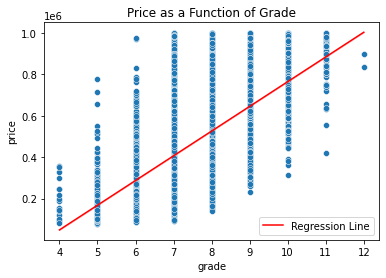

In [85]:
# Linearity

fig, ax = plt.subplots()

sns.scatterplot(x=X_train['grade'], y=y_train['price'], ax=ax)

ax.set_title('Price as a Function of Grade')

sns.lineplot(x=X_train['grade'], y=linreg.predict(X_train).reshape(-1), color='r', label='Regression Line')

ax.legend();

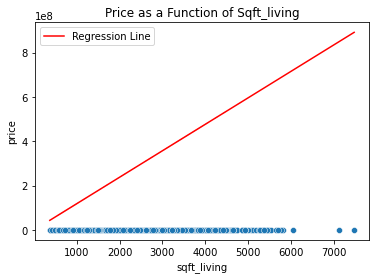

In [86]:
# Linearity (for baseline model 2)

fig, ax = plt.subplots()

sns.scatterplot(x=X_train2['sqft_living'], y=y_train2['price'], ax=ax)

ax.set_title('Price as a Function of Sqft_living')

sns.lineplot(x=X_train2['sqft_living'], y=linreg.predict(X_train2).reshape(-1), color='r', label='Regression Line')

ax.legend();

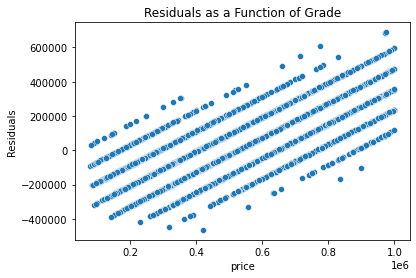

In [54]:
# Homoscedasticity & normality of residuals

residuals = y_train - linreg.predict(X_train)

fig, ax = plt.subplots()

ax.set_title('Residuals as a Function of Grade')

ax.set_ylabel('Residuals')

sns.scatterplot(x=y_train['price'], y=residuals['price']);

As price increases, the error in our model increases. This does NOT look like homoscedasticity is satisifed. Let's also check a qq plot.

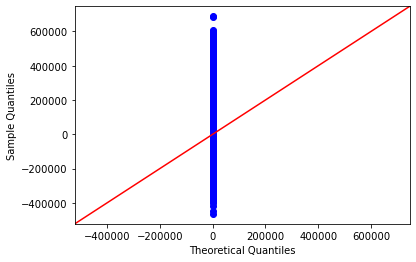

In [55]:
import statsmodels.api as sm

sm.qqplot(residuals, line='45');

The residuals are definitely not normally distributed.

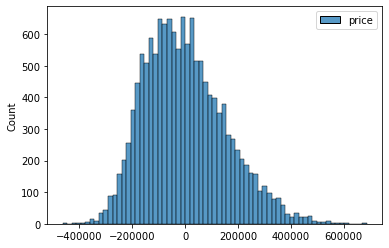

In [56]:
sns.histplot(residuals);

## Using Statsmodels

In [133]:
# import necessary packages
import statsmodels.api as sm
from statsmodels.formula.api import ols

# build the formula string
outcome = 'y_train'
predictor = 'sqft_living'
formula = outcome + '~' + predictor

# pass formula string and concatenated training data to ordinary least squares
model = ols(formula=formula, data=pd.concat([X_train,y_train], axis=1)).fit()

# view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.469e+04
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        10:05:17   Log-Likelihood:            -2.1003e+05
No. Observations:               15117   AIC:                         4.201e+05
Df Residuals:                   15115   BIC:                         4.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.379e+04   5282.288     -8.290      0.000   -5.41e+04   -3.34e+04
sqft_living   280.8724      2.317    121.199      0.000     276.330     285.415
==============================================================================
Omnibus:                    10451.928   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399154.274
Skew:                           2.839   Prob(JB):                         0.00
Kurtosis:                      27.525   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

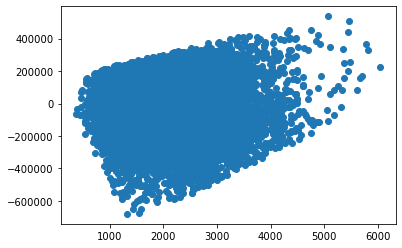

In [82]:
# checking assumptions - what do the residuals look like?

residuals = model.predict(X_train) - y_train

fig, ax = plt.subplots()

ax.scatter(X_train, residuals);

The residuals are huge! There is a little bit of a pattern in the residuals. Am I failing the normality of residuals assumption?

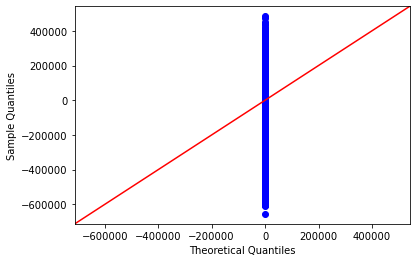

In [112]:
sm.qqplot(residuals, line='45');

Oh my goodness. The residuals are not distributed normally at all. How do I fix this?

In [86]:
# add next most correlated feature to model

features = ['sqft_living']
features.append('sqft_living15')

X_train, X_test, y_train, y_test = train_test_split(
    data.loc[:, features],
    data['price'],
    test_size=0.3,
    random_state=421,
    shuffle=True
)

In [88]:
# build the formula string
outcome = 'y_train'
predictors = X_train[features]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

# pass formula string and concatenated training data to ordinary least squares
model = ols(formula=formula, data=pd.concat([X_train,y_train], axis=1)).fit()

# view the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     4826.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:10   Log-Likelihood:            -1.9172e+05
No. Observations:               14307   AIC:                         3.834e+05
Df Residuals:                   14304   BIC:                         3.835e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.199e+04   4425.388     20.787      0.000    8.33e+04    1.01e+05
sqft_living     122.8647      2.560     47.992      0.000     117.847     127.883
sqft_living15    73.7981      3.205     23.027      0.000      67.516      80.080
==============================================================================
Omnibus:                      713.692   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              823.502
Skew:                           0.576   Prob(JB):                    1.51e-179
Kurtosis:                       3.237   Cond. No.                     9.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

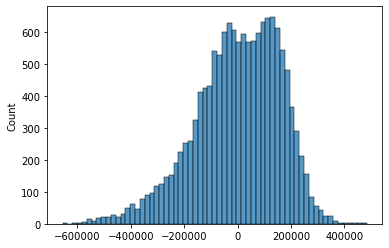

In [107]:
# the residuals LOOK normal

sns.histplot(residuals);

### One Hot Encoding

In [ ]:
# one hot encode zipcode

from sklearn.preprocessing import OneHotEncoder

zip_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

zip_ohe.fit(X_train[['zipcode']])

new_zipcode_cols = zip_ohe.get_feature_names(input_features=['zipcode'])

X_train_ohe = pd.DataFrame(zip_ohe.fit_transform(X_train[['zipcode']]), columns = new_zipcode_cols,\
                          index = X_train.index)

X_train = pd.concat([X_train.drop('zipcode', axis=1), X_train_ohe], axis=1)